Text(0.5, 1.0, 'Original image')

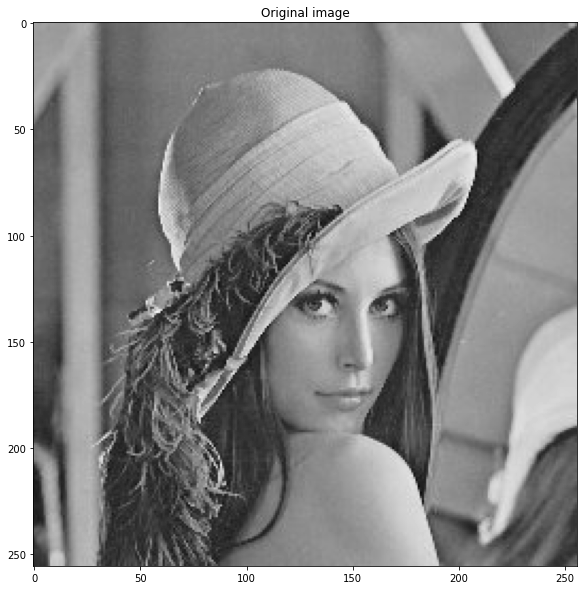

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO


#url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

url = 'https://www.researchgate.net/profile/Tao-Chen-87/publication/3935609/figure/fig1/AS:394647298953219@1471102656485/8-bit-256-x-256-Grayscale-Lena-Image_Q320.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img.thumbnail((512, 512), Image.ANTIALIAS)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")



In [12]:
class Transform:
  image = None
  def __init__(self, image):
    self.image = image
  def post_process_image(self, image):
        a = 0
        b = 255
        c = np.min(image)
        d = np.max(image)
        rows, columns = np.shape(image)
        image1 = np.zeros((rows, columns), dtype=int)
        for i in range(rows):
            for j in range(columns):
                if (d-c) == 0:
                    image1[i, j] = ((b - a) / 0.000001) * (image[i, j] - c) + a
                else:
                    image1[i, j] = ((b - a) / (d - c)) * (image[i, j] - c) + a

        return np.uint8(image1)
        
  def filtering(self):
        image = self.image
        shape = np.shape(image)
        img = np.asarray(image)

        matrix = [2, 4, 6, 2]
        fft = self.FFT_vectorized(matrix)
        fft = np.fft.fft2(image)
        shift_fft = np.fft.fftshift(fft)
        mag_dft = np.log(np.abs(shift_fft))
        dft = self.post_process_image(mag_dft)
        
        return np.uint8(dft)

  def FFT_vectorized(self, x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

Text(0.5, 1.0, 'Discrete Fourier Transform')

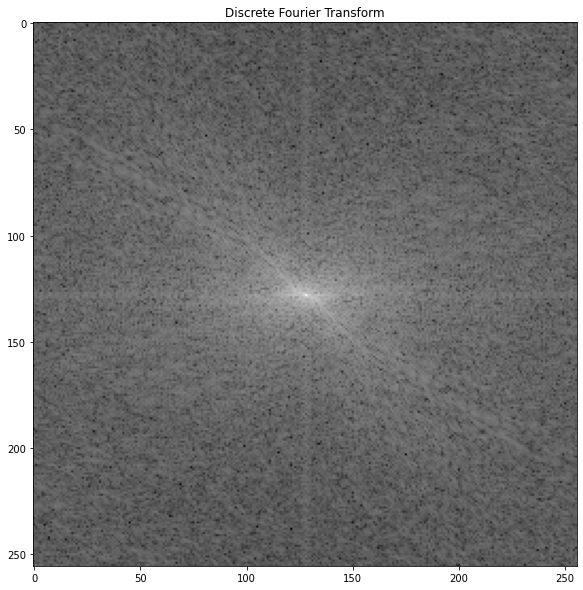

In [13]:
dft_object = Transform(img)

dft = dft_object.filtering()

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(dft, cmap='gray', vmin=0, vmax=255)
plt.title("Discrete Fourier Transform")
